In [1]:
!pip install geopy==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 7.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install geodatasets==2023.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 12.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [25]:
from geopy.geocoders import Nominatim
import geopandas as gpd
import pandas as pd
import geodatasets
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [4]:
all_df = _deepnote_execute_sql('SELECT *\n    FROM \'BusCorrected.csv\'\n    WHERE STATE = \'IL\' AND CITY = \'CHICAGO\' \n    AND ADDRESS IS NOT NULL \n    AND CITY IS NOT NULL \n    AND STATE IS NOT NULL \n    AND ZIP_CODE IS NOT NULL \n    AND LATITUDE IS NOT NULL \n    AND LONGITUDE IS NOT NULL;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
all_df

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DBA,ADDRESS,CITY,STATE,ZIP_CODE,...,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,2617269-20220916,2857496,1611,5,TTX COMPANY,TTX COMPANY,4016 S ASHLAND AVE,CHICAGO,IL,60609,...,2022-09-16,2024-09-15,2022-08-05,2022-08-08,AAI,NaT,NaN,41.820285,-87.665397,"(41.82028493557808, -87.66539682158037)"
1,2652692-20201217,2652692,456833,1,JYM INVESTMENTS LLC,WINGMAN,2321 W HOWARD ST 1ST,CHICAGO,IL,60645,...,2020-12-17,2023-01-15,2020-12-16,2020-12-17,AAC,2022-08-08,NaN,42.019413,-87.688628,"(42.019413270594214, -87.68862818775574)"
2,2647849-20200916,2739788,64603,7,LEOPARDO COMPANIES INC.,Leopardo Companies Inc,210 N CARPENTER ST 3RD FLOOR,CHICAGO,IL,60607,...,2020-09-16,2022-09-15,2020-08-20,2020-08-21,AAC,2022-08-08,NaN,41.885945,-87.653462,"(41.88594495760403, -87.65346178255953)"
3,1579838-20220616,2842924,289144,1,"1021 MONTROSE, L.L.C.",Driftwood,1021 W MONTROSE AVE,CHICAGO,IL,60613,...,2022-06-16,2024-06-15,2022-05-10,2022-05-11,AAI,NaT,34.0,41.961655,-87.655650,"(41.961655308981946, -87.65564994485091)"
4,2027540-20220616,2841687,10726,5,GRAHAM ENTERPRISE INC,Rock N Roll BP (GEI-157),631-647 N LA SALLE DR,CHICAGO,IL,60654,...,2022-06-16,2024-06-15,2022-05-10,2022-05-11,AAI,NaT,NaN,41.893251,-87.632493,"(41.89325119846543, -87.63249301222938)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033611,2204520-20160716,2465534,25985,1,"AABALL HEATING SERVICE & SUPPLIES, INC.",AABALL HEATING SERVICE & SUPPLIES,8518 S ASHLAND AVE,CHICAGO,IL,60620,...,2016-07-16,2018-07-15,2016-05-31,2016-06-01,AAI,NaT,69.0,41.738831,-87.663289,"(41.738831043655715, -87.66328877414871)"
1033612,2652764-20210316,2770633,456868,1,SHOBHNA INC.,FOOD STOP,3734 W LAWRENCE AVE,CHICAGO,IL,60625,...,2021-03-16,2022-03-15,2021-04-02,2021-04-05,AAI,NaT,NaN,41.968417,-87.722060,"(41.96841672465387, -87.7220597187097)"
1033613,6415-20070816,1832401,376290,2,"FRANK'S CHICAGO SHRIMP HOUSE, INC.",FRANK'S CHICAGO SHRIMP HOUSE,5439 W ADDISON ST 1ST,CHICAGO,IL,60641,...,2007-08-16,2009-08-15,2007-08-24,2008-05-22,AAI,NaT,NaN,41.945810,-87.763441,"(41.94580991762778, -87.76344146216435)"
1033614,1800007-20070124,1800007,313705,1,TERRANCE J. WATTS,TERRANCE J. WATTS,9932 S SANGAMON ST,CHICAGO,IL,60643,...,2007-01-24,2009-02-15,NaT,2007-01-24,AAI,NaT,NaN,41.713160,-87.646789,"(41.71316042726137, -87.6467890258547)"


In [5]:
df_1 = _deepnote_execute_sql('SELECT LEGAL_NAME,DBA, ADDRESS, CITY, STATE, ZIP_CODE, BUSINESS_ACTIVITY_ID, BUSINESS_ACTIVITY, LATITUDE, LONGITUDE\n    FROM all_df\n    WHERE STATE = \'IL\' AND CITY = \'CHICAGO\' \n      AND COALESCE(ADDRESS, CITY, STATE, ZIP_CODE, BUSINESS_ACTIVITY_ID, BUSINESS_ACTIVITY, LATITUDE, LONGITUDE) != \'None\'\n    LIMIT 1000000', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,LEGAL_NAME,DBA,ADDRESS,CITY,STATE,ZIP_CODE,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LATITUDE,LONGITUDE
0,TTX COMPANY,TTX COMPANY,4016 S ASHLAND AVE,CHICAGO,IL,60609,708,Miscellaneous Commercial Services,41.820285,-87.665397
1,JYM INVESTMENTS LLC,WINGMAN,2321 W HOWARD ST 1ST,CHICAGO,IL,60645,781,Sale of Food Prepared Onsite With Dining Area,42.019413,-87.688628
2,LEOPARDO COMPANIES INC.,Leopardo Companies Inc,210 N CARPENTER ST 3RD FLOOR,CHICAGO,IL,60607,602,Administrative Commercial Office,41.885945,-87.653462
3,"1021 MONTROSE, L.L.C.",Driftwood,1021 W MONTROSE AVE,CHICAGO,IL,60613,829,Tavern - Consumption of Liquor on Premise,41.961655,-87.655650
4,GRAHAM ENTERPRISE INC,Rock N Roll BP (GEI-157),631-647 N LA SALLE DR,CHICAGO,IL,60654,666,Operation of a Fuel Filling Station,41.893251,-87.632493
...,...,...,...,...,...,...,...,...,...,...
999995,VEHICLE ALIGN & BRAKE,LUCAS TIRES,3501 N WESTERN AVE,CHICAGO,IL,60618,None,None,41.945012,-87.688062
999996,"Y & Y ENTERPRISE, INC.",BOOST MOBILE,7356 S HALSTED ST 1ST,CHICAGO,IL,60621,None,None,41.759890,-87.644425
999997,"FEDEX OFFICE AND PRINT SERVICES, INC.","FEDEX OFFICE AND PRINT SVCS, INC.",1242 S CANAL ST 6,CHICAGO,IL,60607,None,None,41.866070,-87.639355
999998,"3201 ADDISON, INC.",ADDISON BP,3201 W ADDISON ST 1ST,CHICAGO,IL,60618,763,Retail Sale of Tobacco,41.946521,-87.707870


In [6]:
df_8 = _deepnote_execute_sql('', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

In [7]:
# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

def getLongAlt(address):
    getLoc = loc.geocode(address)
    return getLoc.latitude, getLoc.longitude


131

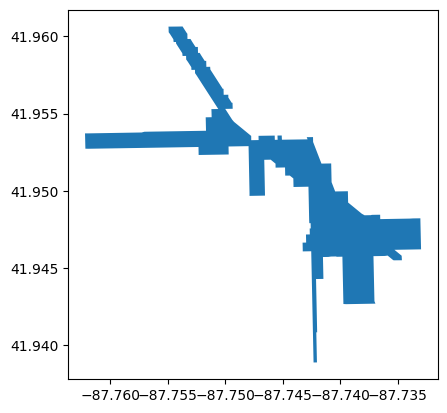

In [8]:
# This cell from Alattin Kirtisoglu
tif = gpd.read_file('/work/chiTifBoundaries.shp')
# Set the coordinate reference system to the standard latitude/longitude system
tif = tif.set_crs(epsg=4326)

# tif.plot()
tif.iloc[[0]].plot()
tif.shape
len(tif)

In [9]:
tif

,geometry
0,"POLYGON ((-87.75331 41.96016, -87.75330 41.959..."
1,"POLYGON ((-87.66736 41.72021, -87.66735 41.719..."
2,"POLYGON ((-87.60970 41.82334, -87.60969 41.822..."
3,"POLYGON ((-87.53587 41.72304, -87.53450 41.721..."
4,"POLYGON ((-87.52691 41.72630, -87.52691 41.726..."
...,...
126,"POLYGON ((-87.63455 41.87438, -87.63454 41.874..."
127,"POLYGON ((-87.62952 41.85532, -87.62945 41.855..."
128,"POLYGON ((-87.64485 41.88255, -87.64474 41.882..."
129,"POLYGON ((-87.74351 41.81422, -87.74351 41.814..."


Extracting 'chicago_commpop/chicago_commpop.geojson' from '/root/.cache/geodatasets/chicago_commpop.zip' to '/root/.cache/geodatasets/chicago_commpop.zip.unzip'


<AxesSubplot: >

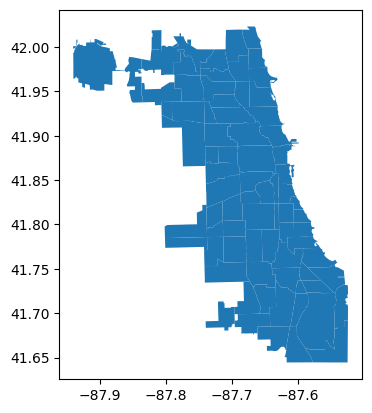

In [10]:
# Map of Chicago
chicago_map = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago_map = chicago_map['geometry']

chicago_map.plot()

In [11]:
# df_1 = df_1.dropna()

# df_1['BUSINESS_ACTIVITY'].unique()

# for index, row in df_1.iterrows():
#     business_activity = row['BUSINESS_ACTIVITY'].lower()
#     if "dining" in business_activity:
#         df_1.at[index, 'TYPE'] = "Restaurant"
#     elif "fuel" in business_activity:
#         df_1.at[index, 'TYPE'] = "Gas Stations"
#     elif "food" in business_activity:
#         df_1.at[index, 'TYPE'] = "Groceries"
#     elif "retail" in business_activity or "wholesale" in business_activity:
#         df_1.at[index, 'TYPE'] = "Sales"
#     elif "finance" in business_activity or "accounting" in business_activity:
#         df_1.at[index, 'TYPE'] = "Financial"
#     elif "liquor" in business_activity or "bar" in business_activity:
#         df_1.at[index, 'TYPE'] = "Alcohol"
#     else:
#         df_1.at[index, 'TYPE'] = "TBD"



In [12]:
df_1[df_1["TYPE"]=="TBD"]["BUSINESS_ACTIVITY"].unique()

KeyError: 'TYPE'

In [ ]:
# unique_counts = df_1['BUSINESS_ACTIVITY'].value_counts()

# unique_counts_df = unique_counts.reset_index()
# unique_counts_df.columns = ['Category', 'Count']

# print("Counts of unique values in the 'Category' column:")
# print(unique_counts_df)

Counts of unique values in the 'Category' column:
                                               Category   Count
0                      Retail Sales of Perishable Foods  133864
1                                Retail Sale of Tobacco   43427
2                     Consumption of Liquor on Premises   34670
3             Tavern - Consumption of Liquor on Premise   17870
4                       Retail Sales of Packaged Liquor   15383
...                                                 ...     ...
3437  Electronic Equipment Repair | Retail Sales of ...       1
3438  Printing Activities, Metal Processing | Retail...       1
3439  Clothing Alterations | Dry Cleaning - Drop Off...       1
3440  Miscellaneous Personal Services | Rental of Ge...       1
3441  Professional Consulting (Home Based Business) ...       1

[3442 rows x 2 columns]


In [ ]:
df_2 = _deepnote_execute_sql('SELECT LEGAL_NAME,ADDRESS, COUNT(*) as Count\nFROM all_df\nGROUP BY LEGAL_NAME, ADDRESS\nORDER BY Count DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,LEGAL_NAME,ADDRESS,Count
0,"ALLIED WASTE TRANSPORTATION, INC.",2608 S DAMEN AVE,1189
1,WASTE MANAGEMENT OF ILLINOIS INC.,1500 N HOOKER ST,975
2,"TRIPLE A SERVICES, INC.",2637 S THROOP ST,612
3,FLOOD BROS DISPOSAL CO.,4815-4835 W HARRISON ST,409
4,RAUL MARTINEZ,2404 W 46TH PL,343
...,...,...,...
222248,"BARK CHICAGO, INC.",1765 N ELSTON AVE 1ST 104,1
222249,SABOR LATINO INC,200 S MICHIGAN AVE,1
222250,AWA FOMBA,11551 S CARPENTER ST,1
222251,"LOS DOS LAREDOS RESTAURANT, INC.",100 S MICHIGAN AVE,1


In [ ]:
df_6 = _deepnote_execute_sql('SELECT DISTINCT LATITUDE, LONGITUDE, LEGAL_NAME\nFROM all_df;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

,LATITUDE,LONGITUDE,LEGAL_NAME
0,41.820285,-87.665397,TTX COMPANY
1,42.019413,-87.688628,JYM INVESTMENTS LLC
2,41.885945,-87.653462,LEOPARDO COMPANIES INC.
3,41.961655,-87.655650,"1021 MONTROSE, L.L.C."
4,41.893251,-87.632493,GRAHAM ENTERPRISE INC
...,...,...,...
216717,41.914743,-87.664978,"BARK CHICAGO, INC."
216718,41.879489,-87.624498,SABOR LATINO INC
216719,41.683502,-87.648037,AWA FOMBA
216720,41.880771,-87.624483,"LOS DOS LAREDOS RESTAURANT, INC."


In [19]:
df_9 = _deepnote_execute_sql('SELECT LICENSE_CODE, Count(LICENSE_CODE) as cnt\nFROM all_df\nGROUP BY LICENSE_CODE\nORDER BY cnt', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_9

,LICENSE_CODE,cnt
0,7026,1
1,7036,1
2,1841,1
3,1063,1
4,1686,1
...,...,...
140,1475,37061
141,4404,45671
142,1781,52918
143,1006,171426


In [20]:
Lic_name_df = _deepnote_execute_sql('SELECT DISTINCT LICENSE_DESCRIPTION\nfrom all_df', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
Lic_name_df

,LICENSE_DESCRIPTION
0,Limited Business License
1,Retail Food Establishment
2,Tavern
3,Filling Station
4,Regulated Business License
...,...
140,Airport Pushcart Liquor O'Hare - Class A
141,Pop-Up Food Est. User - Tier III
142,Repossessor Class B
143,Guard Dog Service


In [34]:
p = Lic_name_df['LICENSE_DESCRIPTION'].tolist()
len(p)

145

LICENSE_DESCRIPTION

In [ ]:
df_7 = _deepnote_execute_sql('SELECT *\nFROM all_df\nWHERE EXTRACT(YEAR FROM CAST(LICENSE_TERM_EXPIRATION_DATE AS DATE)) BETWEEN 2006 AND 2020;\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DBA,ADDRESS,CITY,STATE,ZIP_CODE,...,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1899783-20090316,1953094,330192,1,ELIAS A. KANELLOPOULOS,RITZ CLEANERS,200 E DELAWARE PL 1,CHICAGO,IL,60611,...,2009-03-16,2011-03-15,2009-02-20,2009-02-23,AAI,NaT,NaN,41.899355,-87.621791,"(41.89935473944382, -87.621791301926)"
1,1899783-20110316,2078221,330192,1,ELIAS A. KANELLOPOULOS,RITZ CLEANERS,200 E DELAWARE PL 1,CHICAGO,IL,60611,...,2011-03-16,2013-03-15,2011-02-14,2011-02-15,AAI,NaT,NaN,41.899355,-87.621791,"(41.89935473944382, -87.621791301926)"
2,2212246-20180816,2604971,334772,2,MIGUEL ANGEL DUARTE-SOLIS,MIGUEL ANGEL DUARTE-SOLIS,5015 S DAMEN AVE 1ST,CHICAGO,IL,60609,...,2018-08-16,2020-10-15,NaT,2018-08-22,AAI,NaT,NaN,41.802569,-87.674396,"(41.802569455769735, -87.67439575456822)"
3,1694745-20061116,1753621,64603,5,LEOPARDO COMPANIES INC.,LEOPARDO COMPANIES INC,1945 W HUBBARD ST B,CHICAGO,IL,60622,...,2006-11-16,2007-11-15,2006-11-03,2006-11-06,AAI,NaT,NaN,41.889628,-87.676231,"(41.8896277030332, -87.67623090978807)"
4,2289988-20131009,2289988,385607,1,360 CONSTRUCTION LLC,360 CONSTRUCTION LLC,1830 S ALLPORT ST,CHICAGO,IL,60608,...,2013-10-09,2015-10-15,2013-10-09,2013-10-09,AAI,NaT,NaN,41.856995,-87.657770,"(41.85699465721177, -87.6577696330932)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626266,2283718-20150216,2371710,322234,2,"GUARANTEED MEDICAL SERVICE, INC.","GUARANTEED MEDICAL SERVICES, INC.",6619 W ARCHER AVE IST,CHICAGO,IL,60638,...,2015-02-16,2017-02-15,2015-02-11,2015-02-13,AAI,NaT,NaN,41.792122,-87.787572,"(41.79212203192581, -87.78757215070192)"
626267,1800644-20091116,1996441,313982,1,"JH ELECTRONICS, INC.",ACE SOUND SYSTEM,2500 N MILWAUKEE AVE 201,CHICAGO,IL,60647,...,2009-11-16,2011-11-15,2009-11-20,2009-11-25,AAI,NaT,NaN,41.926737,-87.703828,"(41.92673659835983, -87.70382782692913)"
626268,2204520-20160716,2465534,25985,1,"AABALL HEATING SERVICE & SUPPLIES, INC.",AABALL HEATING SERVICE & SUPPLIES,8518 S ASHLAND AVE,CHICAGO,IL,60620,...,2016-07-16,2018-07-15,2016-05-31,2016-06-01,AAI,NaT,69.0,41.738831,-87.663289,"(41.738831043655715, -87.66328877414871)"
626269,6415-20070816,1832401,376290,2,"FRANK'S CHICAGO SHRIMP HOUSE, INC.",FRANK'S CHICAGO SHRIMP HOUSE,5439 W ADDISON ST 1ST,CHICAGO,IL,60641,...,2007-08-16,2009-08-15,2007-08-24,2008-05-22,AAI,NaT,NaN,41.945810,-87.763441,"(41.94580991762778, -87.76344146216435)"


In [ ]:
df_5 = _deepnote_execute_sql('SELECT LEGAL_NAME, DBA, ADDRESS, BUSINESS_ACTIVITY\nfrom all_df\nWHERE LEGAL_NAME = \'CHICAGO HILTON LLC\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,LEGAL_NAME,DBA,ADDRESS,BUSINESS_ACTIVITY
0,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Consumption of Liquor on Premises
1,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Consumption of Liquor on Premises
2,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Sale of Liquor Outdoors on Private Property
3,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Consumption of Liquor on Premises
4,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Consumption of Liquor on Premises
...,...,...,...,...
224,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Retail Sale of Tobacco
225,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Retail Sales of Perishable Foods
226,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Retail Sales of Perishable Foods
227,CHICAGO HILTON LLC,CHICAGO HILTON & TOWERS,720 S MICHIGAN AVE,Provides Onsite Amusement or Entertainment


In [ ]:
df_3 = _deepnote_execute_sql('SELECT LEGAL_NAME,DBA, BUSINESS_ACTIVITY from \'BusCorrected.csv\' \nwhere BUSINESS_ACTIVITY_ID = \'None\'\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,LEGAL_NAME,DBA,BUSINESS_ACTIVITY


<AxesSubplot: >

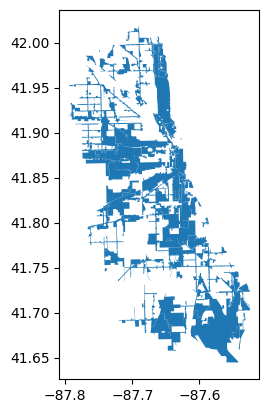

In [ ]:
# functions to find tif district

from geopy.geocoders import Nominatim

Adress = "800 W Fulton Market, Chicago, IL 60607"
TIF = "Kinzie Industrial Conservation Area"

def addressInsideTIF(address):
    # calling the Nominatim tool and create Nominatim class
    loc = Nominatim(user_agent="Geopy Library")

    # entering the location name
    getLoc = loc.geocode(address)

    # convert to a point
    addressPoint = Point(getLoc.latitude, getLoc.longitude)

    # give it to the isInsideTIF function as a point and return the result
    return isInsideTIF(addressPoint)

def isInsideTIF(point):
    # takes a Point class and returns the index of the TIF that contains the Point
    # NOTE: RETURNS AN ARRAY NOT BOOL
    returnArray = []
    # iterate over all the distrcits and see if it contains the given point
    for index, row in tif.iterrows():
        if row['geometry'].contains(point):
            returnArray.append(index)
    
    return returnArray

addressInsideTIF(Adress)

In [ ]:
# this adds the tif number column tool over 2 hours
# df_1['TIF_Number'] = [isInsideTIF(Point(row['LONGITUDE'],row['LATITUDE'])) for index, row in df_1.iterrows()]
# df_1


KeyboardInterrupt



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>